In [33]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn import metrics

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


Cargamos los datos

In [34]:
data = pd.read_csv('attrition_availabledata_35.csv.gz', compression="gzip")

#Informción general
data.info()
#Variable objetivo
data.Attrition.value_counts().sort_index() #Número de muestras por clase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2923 non-null   float64
 5   JobSatisfaction          2925 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

Attrition
No     2466
Yes     474
Name: count, dtype: int64

Vemos que el problema esta claramente que el problema esta desbalanceado

Datos de las variables numéricas

In [35]:
data.describe(include="all")

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2940.000000,2940.000000,2940.000000,2940.000000,2923.000000,2925.000000,2911.000000,2940.000000,2940,2940,...,2940,2940.00000,2940.0,2940.000000,2932.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travel_Rarely,Research & Development,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2090,1934,...,2940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2466
mean,7.320117,12.742177,2.739456,3.153061,2.722545,2.702564,2.764342,36.821769,NaN,NaN,...,NaN,15.19898,8.0,0.807143,11.085266,2.808163,6.807143,2.104422,4.047279,NaN
std,1.323735,5.469286,0.703954,0.360108,1.097565,1.104528,0.706946,9.076976,NaN,NaN,...,NaN,3.63111,0.0,0.863941,7.688109,1.318051,5.912877,3.106970,3.510080,NaN
min,5.465741,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,NaN,NaN,...,NaN,11.00000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6.285345,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,NaN,NaN,...,NaN,12.00000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN
50%,7.023295,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.500000,NaN,NaN,...,NaN,14.00000,8.0,1.000000,9.000000,3.000000,5.000000,1.000000,3.000000,NaN
75%,7.901329,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,NaN,NaN,...,NaN,18.00000,8.0,1.000000,15.000000,3.000000,9.000000,2.000000,7.000000,NaN


In [36]:
print(data.keys())

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')


Vamos a ver el tipo de variables que tiene el problema

In [37]:
print(data.dtypes)

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromot

In [38]:
# Variables categóricas (de tipo object)
cat_cols = data.select_dtypes(include=["object"]).columns
print("Variables categóricas:", list(cat_cols))

# Variables numéricas (int64 y float64)
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
print("Variables numéricas:", list(num_cols))

Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Empezamos borrando las columnas que aportan datos irrelevantes

In [39]:
#Variable a estudiar BussineTravel
print(data["BusinessTravel"].value_counts()) #Parece que tiene valores distribuidos, por lo que la vamos a dejar

#Variable a estudiar EmployeeCount
print(data["EmployeeCount"].value_counts())  #Solo tiene un único valor, por lo que es una variable descartable

#La variable EmployeeID es irrelevante en el modelo, por lo que la descartamos igual

#Variable a estudiar Over18
print(data["Over18"].value_counts()) #Único valor --> descartable

#Variable a estudiar StandardHours
print(data["StandardHours"].value_counts()) #Único valor --> descartable

#Variable a estudiar TrainigTimesLastYears
print(data["TrainingTimesLastYear"].value_counts()) #Valores Distribuidos

#Vamos a eliminar EmployeeCount, Over18, StandardHours y EmployeeID  por ser irrelevante o tener un único valor


BusinessTravel
Travel_Rarely        2090
Travel_Frequently     563
Non-Travel            287
Name: count, dtype: int64
EmployeeCount
1    2940
Name: count, dtype: int64
Over18
Y    2940
Name: count, dtype: int64
StandardHours
8    2940
Name: count, dtype: int64
TrainingTimesLastYear
2    1113
3     921
4     256
5     252
1     149
6     139
0     110
Name: count, dtype: int64


In [40]:
# Lista de columnas a eliminar
cols_to_drop = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"]

# Eliminamos las columnas del dataset
data = data.drop(columns=cols_to_drop)

# Verificamos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2923 non-null   float64
 5   JobSatisfaction          2925 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  Gender                   2940 non-null   object 
 14  JobLevel                

Tenemos ahora 26 variables a estudiar. Vamos hacer una matriz de correlación para ver si podemos descartar algunas más. Primero tendremos que filtrar los valores numéricos

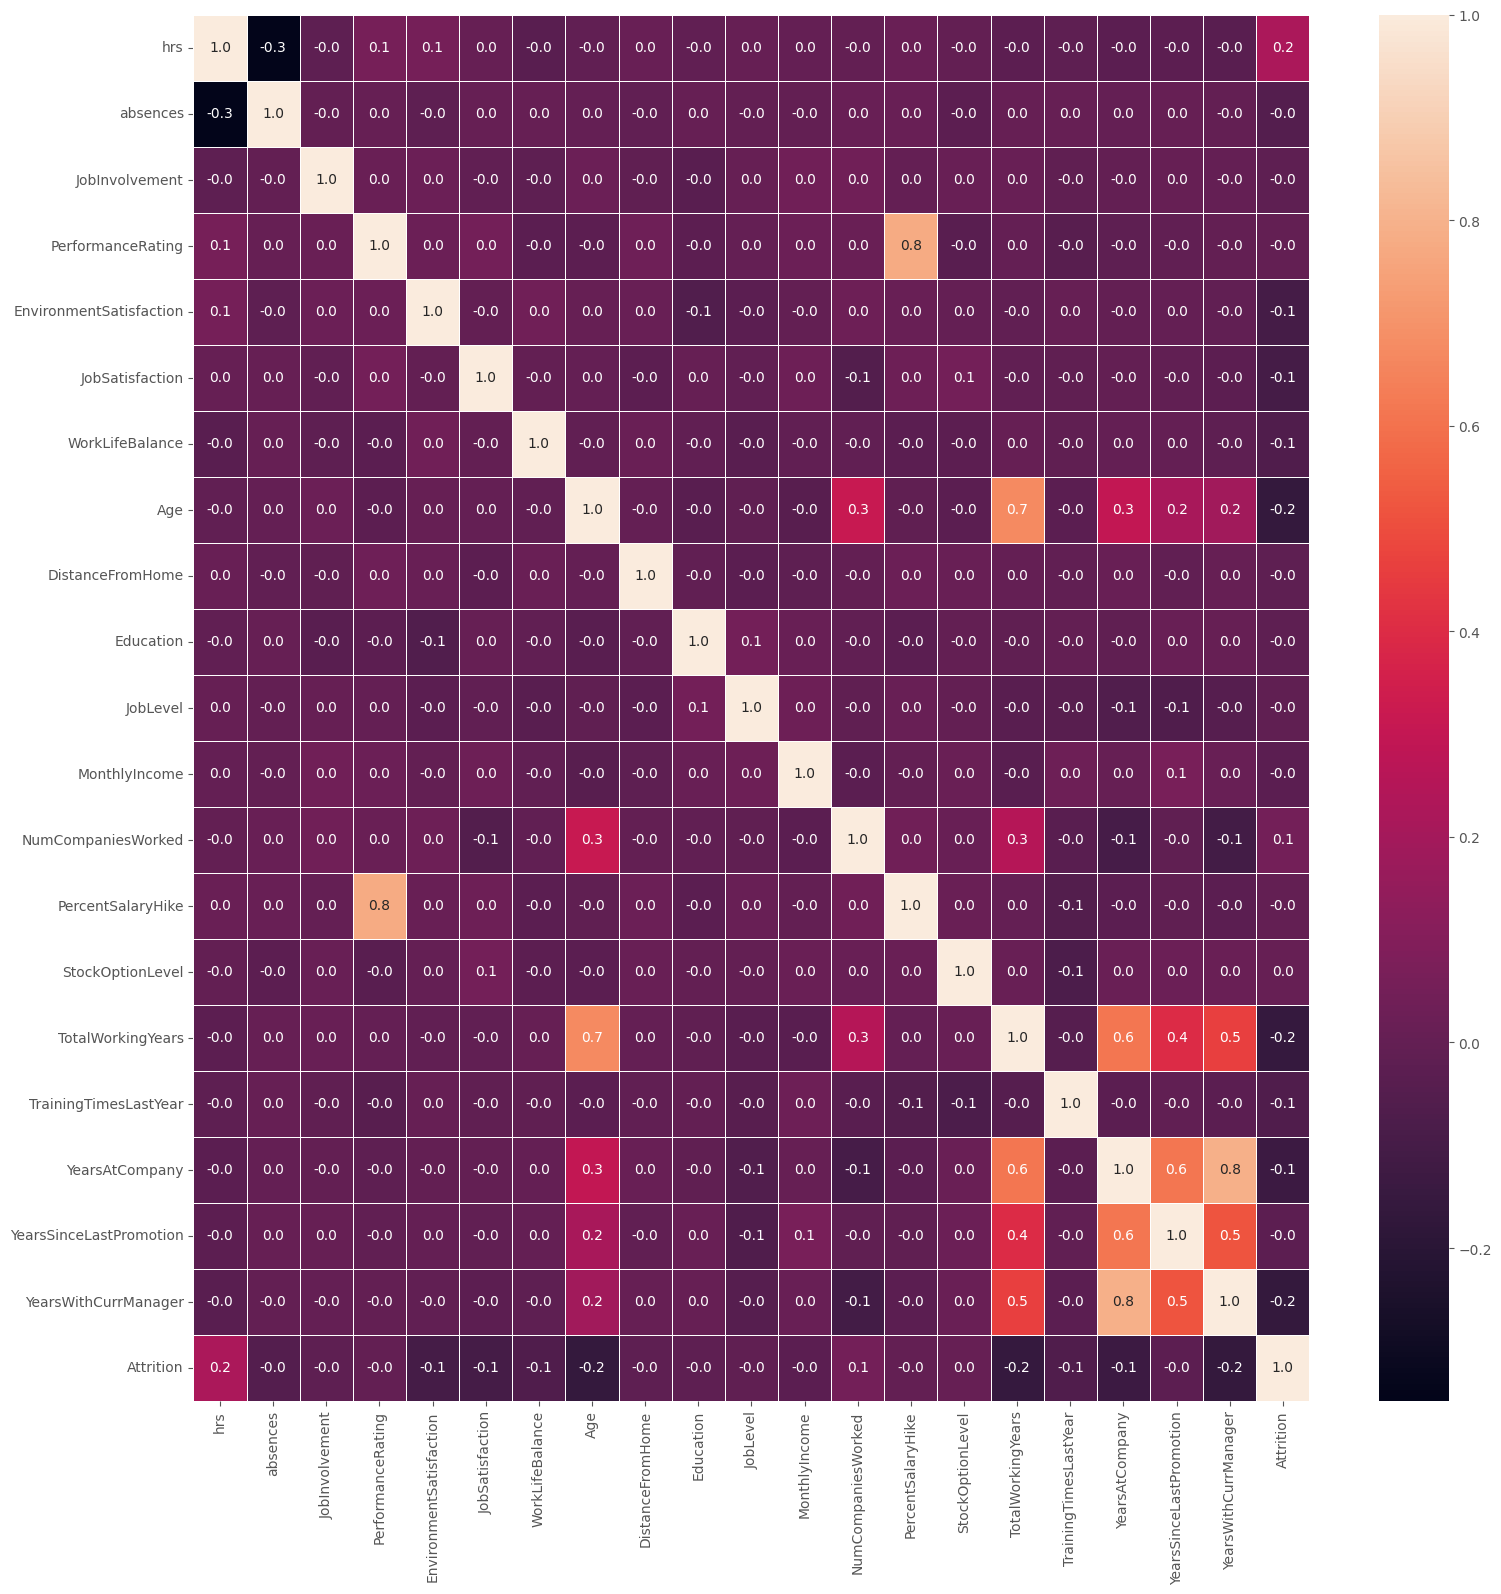

In [41]:
data["Attrition"] = data["Attrition"].map({"Yes": 1, "No": 0})
numeric_data = data.select_dtypes(include=["number"])

corr_matrix = numeric_data.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap (corr_matrix, linewidths = 0.5, annot = True, fmt= '.1f',ax=ax)
plt.show ()

Existen dos parejas de variables con una correlación de 0.8 (PercentSalaryHike/PerformanceRating y YearsInCompany/YearsWithCurrentMananger)
Voy a descartar una variable de cada pareja, en este caso PerformanceRating y YearsAtCompany. Ahora queremos visualizar aquellas variables que estan poco correlacionadas con la variable objetivo. 

In [42]:

corr_with_target = numeric_data.corr()["Attrition"].sort_values(ascending=False)
#Mostramos las variables menos correlacionadas
print(corr_with_target.head(24))

Attrition                  1.000000
hrs                        0.224494
NumCompaniesWorked         0.050489
StockOptionLevel           0.007939
PerformanceRating         -0.003984
PercentSalaryHike         -0.004666
JobLevel                  -0.014543
Education                 -0.019102
DistanceFromHome          -0.019959
JobInvolvement            -0.020372
YearsSinceLastPromotion   -0.025159
MonthlyIncome             -0.027957
absences                  -0.049017
WorkLifeBalance           -0.064673
TrainingTimesLastYear     -0.066726
JobSatisfaction           -0.102506
EnvironmentSatisfaction   -0.104371
YearsAtCompany            -0.136051
TotalWorkingYears         -0.156737
YearsWithCurrManager      -0.159032
Age                       -0.160266
Name: Attrition, dtype: float64


Vamos a ver aquellas que tengan una correlación menor a |0.03| 

In [43]:
# Definir el umbral de correlación
threshold = 0.03  

# Recalcular la matriz de correlación con las columnas actuales del dataset
corr_matrix = data.select_dtypes(include=["number"]).corr()

# Obtener la correlación con Attrition
corr_with_target = corr_matrix["Attrition"].abs()

# Identificar columnas con correlación menor a 0.03 (demasiado bajas)
columns_to_drop = corr_with_target[corr_with_target < threshold].index

# Filtrar solo las columnas que realmente existen en el DataFrame antes de eliminarlas
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Mostrar las columnas 
print("Columnas con menor correlación:", columns_to_drop)


Columnas con menor correlación: ['JobInvolvement', 'PerformanceRating', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel', 'YearsSinceLastPromotion']


Ahora vamos a tratar los valores nulos. Primero vamos a ver que valores son nulos

In [44]:
# Ver cuántos valores nulos hay en cada columna
print(data.isnull().sum())


hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    17
JobSatisfaction            15
WorkLifeBalance            29
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         10
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           8
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64


In [45]:
#Ver solo las columnas que tienen valores nulos y el porcentage de valores nulos que poseen
print(data.isnull().sum()[data.isnull().sum() > 0] , "\n", (data.isnull().sum()[data.isnull().sum() > 0]/ len(data)) *100) 

EnvironmentSatisfaction    17
JobSatisfaction            15
WorkLifeBalance            29
NumCompaniesWorked         10
TotalWorkingYears           8
dtype: int64 
 EnvironmentSatisfaction    0.578231
JobSatisfaction            0.510204
WorkLifeBalance            0.986395
NumCompaniesWorked         0.340136
TotalWorkingYears          0.272109
dtype: float64


HIPERPARÁMETROS Y PIPELINES

Ahora tratamos los valores sabiendo que los valores de Y (Atrittion) estan desbalanceados

In [46]:
#Separamos la variable objetivo con las variables predictorias
X = data.drop(columns=["Attrition"])  
y = data["Attrition"]

#Y ahora dividimos el dataset asegurandonos que la proporción de clases se mantiene igual en los dos conjuntos
# División estratificada en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#Vamos a comprobar los valores
print("Distribución en Train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución en Test:")
print(y_test.value_counts(normalize=True))

Distribución en Train:
Attrition
0    0.838861
1    0.161139
Name: proportion, dtype: float64

Distribución en Test:
Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


La proporción de clases en ambos conjuntos es casi idéntica, lo que confirma que stratify=y ha mantenido el balance de clases en la división.

Codificamos la Salida

In [47]:
#Vamos a ver si la salida de Atrittion es binaria
print("Valores únicos del mapeo:", data["Attrition"].unique())

Valores únicos del mapeo: [0 1]


Como los valores de Atrittion son 0 y 1 ya, no hace falta codificar la salida

In [48]:
X_train.dtypes

hrs                        float64
absences                     int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [49]:
#Analizamos las variables categóricas y numéricas que tenemos
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns
cat_cols


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

Pipeline de las variables categóricas

In [51]:
#Valor más frecuente para calores nulos
#Codificamos en OneHotEncoder
#PCA
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])